##(1) . For the function J(w) = w^2 + (54/w), implement the following methods:
(a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and

(b) identify the critical point using Newton-Raphson method and

(c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [61]:
def J(w):
    return w**2 + 54/w

def brackting(a,b,n):
  dw = (b-a)/n
  w1 = a
  w2 = w1+dw
  w3 = w2 + dw
  while (w3 <= b):
    if (J(w1)>=J(w2) and J(w2)<=J(w3)):
      print(f"Interval Using Bracketing Method :[ {w1} , {w2} ]")
      break
    else:
      w1 = w2
      w2 = w3
      w3 = w3 +dw
  if (w3>b):
    print("the roots are")
  else:
    pass

a = 1
b = 5
n = 5
result = brackting(a,b,n)

Interval Using Bracketing Method :[ 2.6 , 3.4000000000000004 ]


In [62]:
def interval_halving_method(a, b, epsilon):
    L = b - a
    wm = (a + b) / 2
    J_wm = J(wm)

    while L > epsilon:
        w1 = a + L / 4
        w2 = b - L / 4
        J_w1 = J(w1)
        J_w2 = J(w2)

        if J_w1 < J_wm:
            b = wm
            wm = w1
        elif J_w2 < J_wm:
            a = wm
            wm = w2
        else:
            a = w1
            b = w2

        L = b - a
        J_wm = J(wm)

    return wm

a = 2.6
b = 3.4
epsilon = 1e-5
result = interval_halving_method(a, b, epsilon)
print("Critical Point using Region Elimination Method Result:", result)

Critical Point using Region Elimination Method Result: 3.0


In [ ]:
def d1J(w):
  return 2*w - 54/w**2

def d2J(w):
  return 2 + 108/w**3

def newton_raph(w0, epsilon):
  while(abs(d1J(w0)) > epsilon):
    d1 = d1J(w0)
    d2 = d2J(w0)
    w1 = w0 - d1/d2
    d1 = d1J(w1)
    d2 = d2J(w1)
    w0 = w1
  return w0

result = newton_raph(w0 = 0.1, epsilon = 00000.1)
print("Critical Point using Newton Raphson : ",result)

Critical Point using Newton Raphson :  2.986748091721814


##(2).  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2.

Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

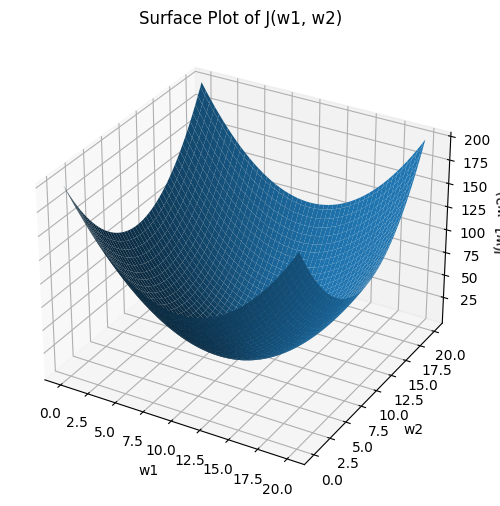

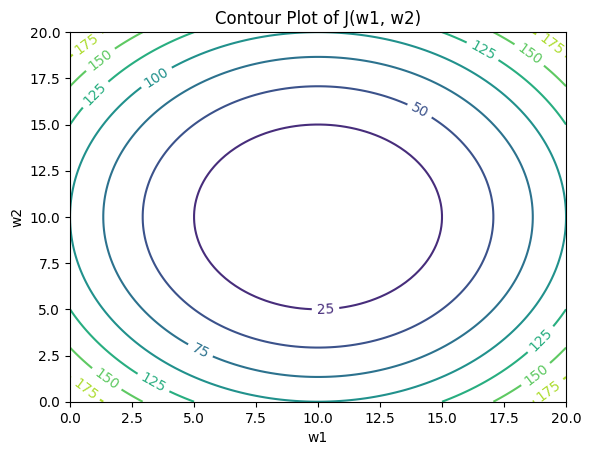

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

w1 = np.linspace(0, 20, 100)
w2 = np.linspace(0, 20, 100)
w1, w2 = np.meshgrid(w1, w2)
J_values = J(w1, w2)

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(w1, w2, J_values)
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.set_zlabel('J(w1, w2)')
ax1.set_title('Surface Plot of J(w1, w2)')

plt.show()

contour = plt.contour(w1, w2, J_values)
plt.clabel(contour)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2)')
plt.show()

##(3). Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5).
You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.

In [4]:
def J(w):
    return (2*w-8)**2 + (5*w-9)**2
brackting(0, 10, 100)

Interval Using Bracketing Method :[ 2.0000000000000004 , 2.1000000000000005 ]


In [63]:
a = 2.0000000000000004
b = 2.1000000000000005
res = interval_halving_method(a,b,1e-5)
print("The Value of alpha is = ",res)

The Value of alpha is =  2.099996948242188


In [29]:
alpha = 2.099996948242188
w1 = 2
w2 = 1
s1 = 2
s2 = 5

w1_min = w1 + alpha * s1
w2_min = w2 + alpha * s2

print(f"Minima w is :[ {w1_min},{w2_min} ]")
min_val = (w1-10)**2 + (w2-10)**2
print("Minimum value is : ",min_val)

Minima w is :[ 6.199993896484376,11.49998474121094 ]
Minimum value is :  145


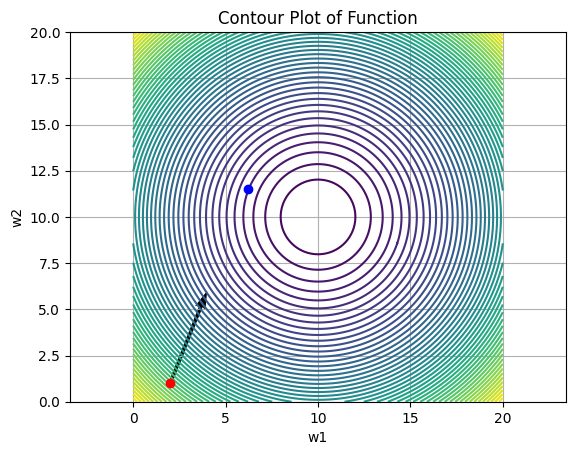

At point: [ 6.1999939  11.49998474]


In [59]:
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

direction = np.array([2, 5])
start_point = np.array([2, 1])
min_point = np.array([6.199993896484376,11.49998474121094])

w1 = np.linspace(0, 20, 400)
w2 = np.linspace(0, 20, 400)
W1, W2 = np.meshgrid(w1, w2)
Z = J(W1, W2)

plt.contour(W1, W2, Z, levels=np.linspace(0, 200))

plt.xlabel('w1')
plt.ylabel('w2')

plt.plot(start_point[0], start_point[1], 'ro')
plt.quiver(start_point[0], start_point[1], direction[0], direction[1], scale_units='xy', scale=1)

plt.plot(min_point[0], min_point[1], 'bo')

plt.title('Contour Plot of Function')
plt.grid(True)
plt.axis('equal')
plt.show()

print("At point:", min_point)